<a href="https://colab.research.google.com/github/chinnusai25/cvit-Workshop2020/blob/master/Day8(June3)(MorningSession_SVDPractice_IndianFlag).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SVD HandsOn**

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

Download India Flag image.<br>
Convert it to grayscale<br>
Open and display that image<br>
Print the dimensions of the image<br>
Compute the number of integers required to store this image<br>

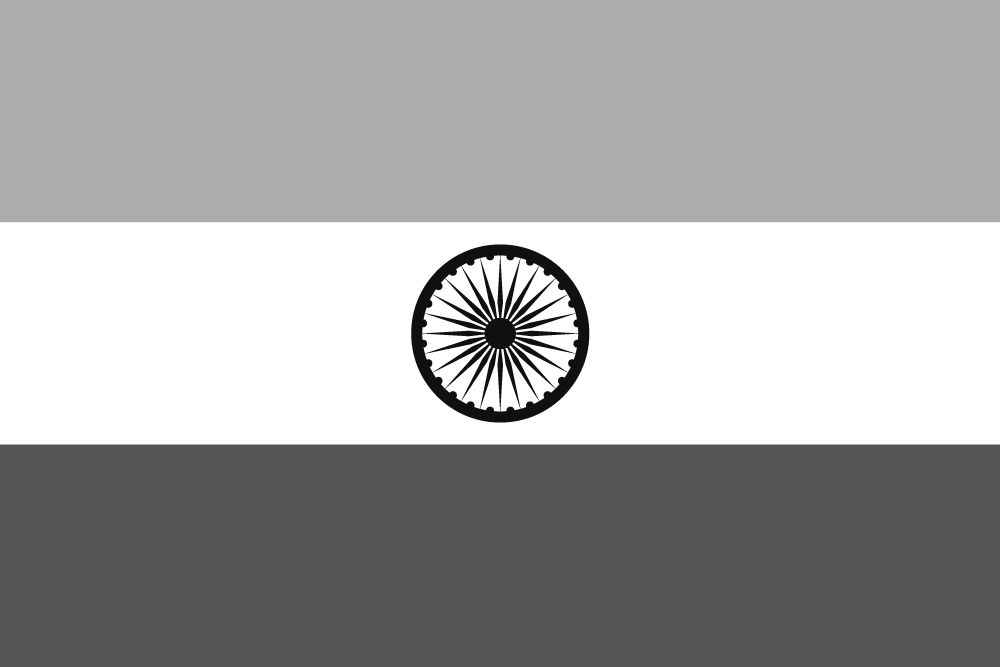

(667, 1000)
667000


In [4]:
I = cv2.imread("/content/Ind.jpg",cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)
print(I.shape)
print(I.shape[0]*I.shape[1])

Apply SVD on the image to get U, D, V_T.<br>
Note how the D matrix is returned. You may need to use other numpy functions to convert to required form of D<br>
Using U, D, V_T reconstruct back the image by matrix multiplication and display the image<br>

U (667, 667)
s (667,)
VT (1000, 1000)
D (667, 667)
z (667, 333)
Updated D (667, 1000)
K (667, 1000)


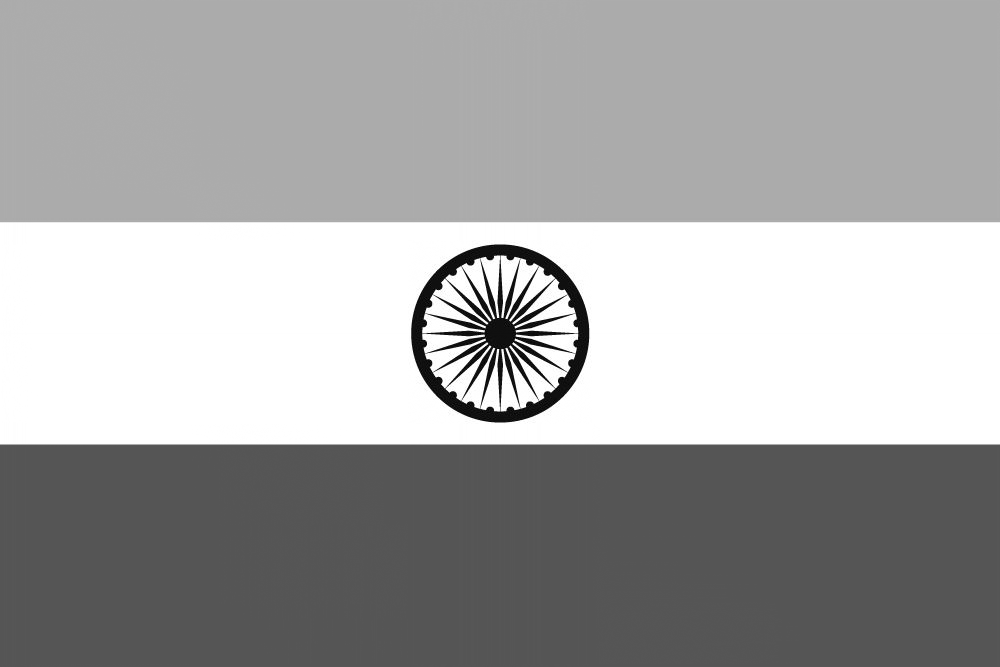

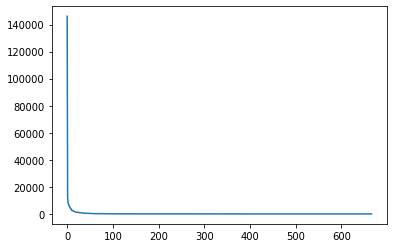

In [64]:
from scipy.linalg import svd
# SVD
U, s, VT = svd(I) #calculating U,s,VT
print("U",U.shape)
print("s",s.shape)
print("VT",VT.shape)
D = np.diag(s) #calculating D matrix using s i.e eigen values
print ("D",D.shape)

a=D.shape[0]
b=VT.shape[1]-a
z = np.zeros((a,b), dtype=int)
print("z",z.shape)

D=np.append(D, z, axis=1) #increasing the size of D matrix since it cant be directly multiplied to VT so we appended some columns which have all zero
print("Updated D",D.shape)
K=U.dot((D.dot(VT))) #multiplying the U,D,VT
print("K",K.shape)
cv2_imshow(K)

x=[i for i in range(0,s.shape[0])]
import matplotlib.pyplot as plt
plt.plot(x,s[:,])

Keep a variable 'component'.<br>
Use only the first 'component' singular values/vectors from U,D,V_T.<br>
Reconstruct using 10 components.<br>

U1 (667, 10)
VT1 (10, 1000)
Updated D (10, 10)
K1 (667, 1000)


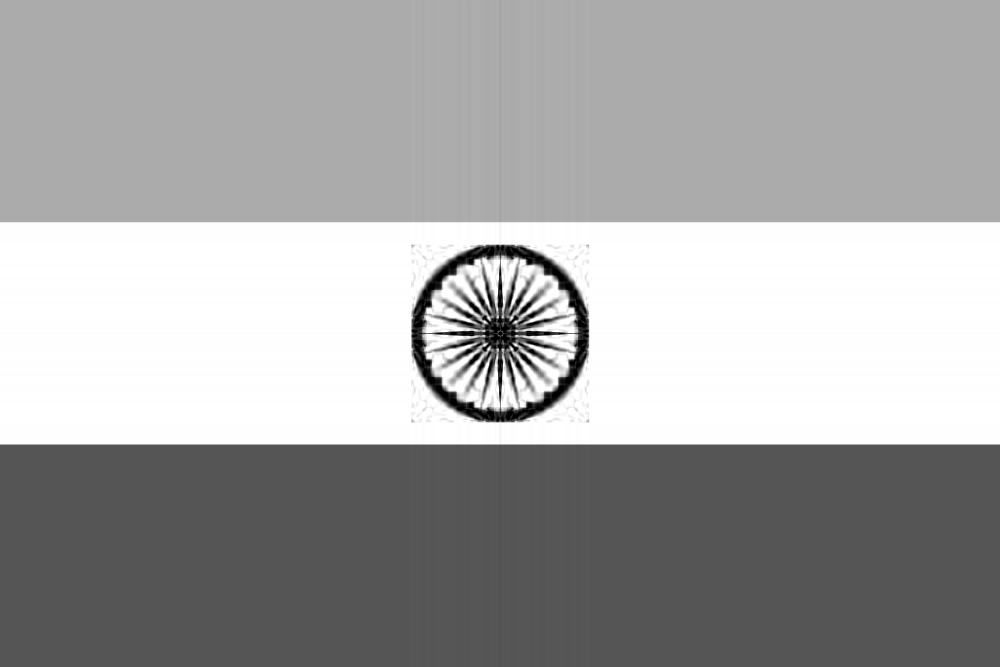

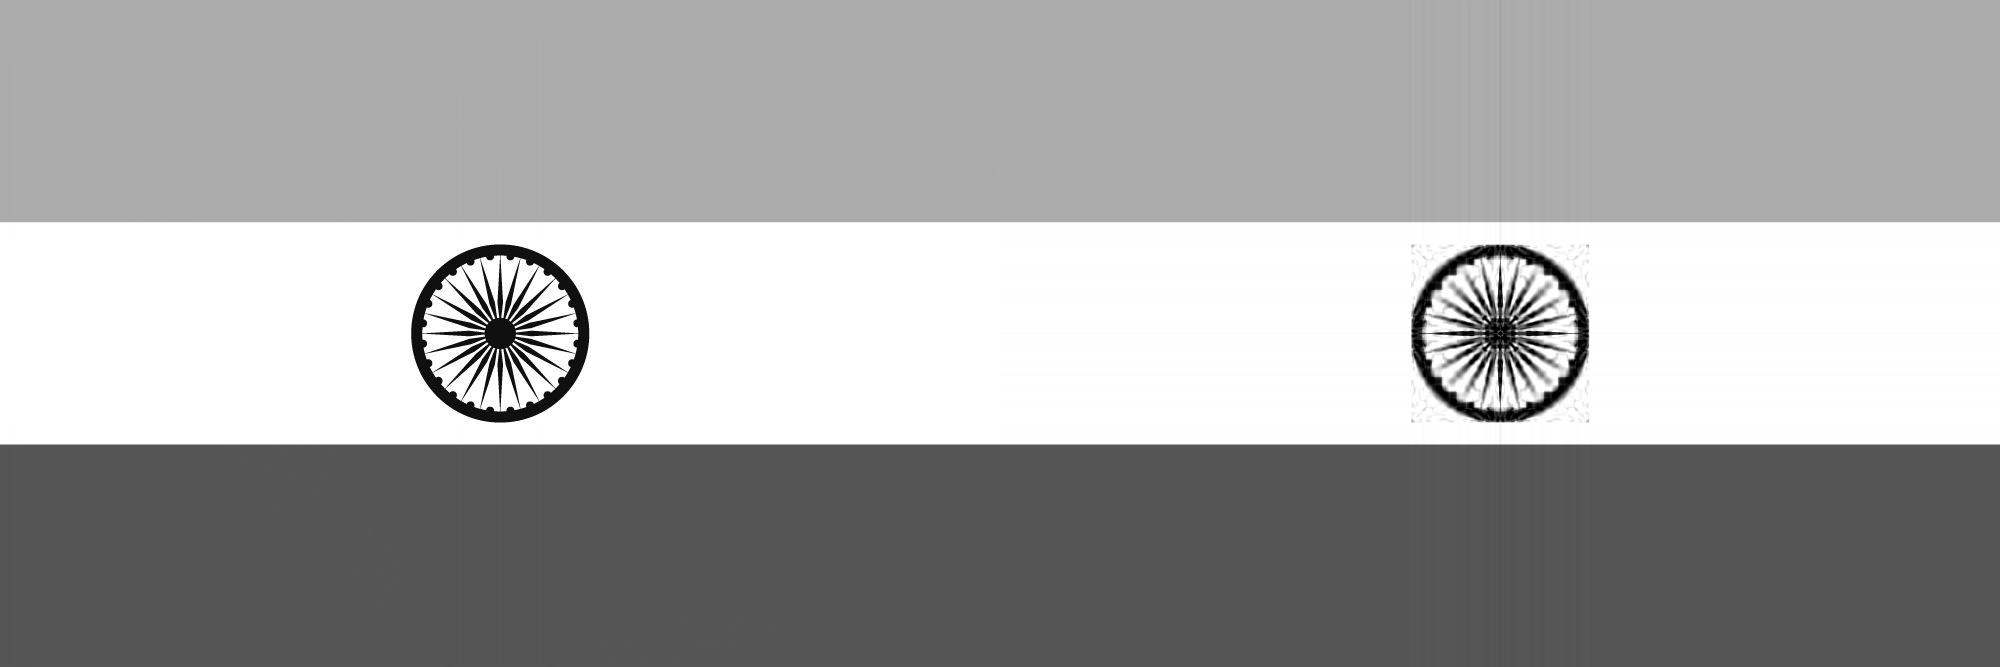

In [58]:
components=10
s1=s[0:components] #selecting the first 10 eigen values
U1=U[:,0:components] #selecting the first 10 columns/eigen vectors of U
print("U1",U1.shape)
VT1=VT[0:components,:] #selecting the first 10 rows/eigen vectors of VT
print("VT1",VT1.shape)

D1 = np.diag(s1)
print("Updated D",D1.shape)
K1=U1.dot((D1.dot(VT1))) #mading up the image using only the first 10 eigen values
print("K1",K1.shape)
cv2_imshow(K1)
cv2_imshow(np.hstack([K,K1]))

In [59]:
Originalsize=I.shape[0]*I.shape[1] #size required to store the original img I
Compressedsize=U1.shape[0]*components+components+components*VT1.shape[1] #size required to store the img made up of using only first 10 eigen values and the 10 eigen vectors of U and VT
print("SizeRatio:",Originalsize/Compressedsize)

SizeRatio: 39.98800959232614


In [60]:
OriginalInfo=np.sum(s) #adding all the eigen values
CompressedInfo=np.sum(s1) #adding only the first 10 eigen values
print(OriginalInfo)
print(CompressedInfo)
print(("InformationPreserved:",CompressedInfo/OriginalInfo)) #finding how much info have we retrieved using only first 10 values.

252072.02
202011.77
('InformationPreserved:', 0.80140495)
